In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
import os
import numpy as np
#%matplotlib notebook

In [2]:
def room_division(dataRoom):
    """
    room_division
    -------------
    take all the data and divide the rooms of all PoliTo
    ### Output:
        - the dataframe with the room divided
    """
    Ap = "AP-AULA"
    dataRoom = dataRoom[dataRoom["name_ap"].str.contains(Ap)]
    rooms = pd.DataFrame()
    rooms[["AP","Room", "APnum", "NaN"]] = dataRoom["name_ap"].str.split(
        "-", expand=True
    )
    dataRoom = pd.concat([dataRoom, rooms], axis=1)
    dataRoom = dataRoom.drop(["AP", "NaN"], axis=1)
    return dataRoom

In [3]:
path = "SNRinTime/"
dict_t = {}
for i, file in enumerate(os.listdir(path)):
    df = room_division(pd.read_csv(path+file))
    df = df[df["Room"] == "AULA3P"]
    df = df[["rssi", "snr"]].dropna().reset_index()
    dict_t[i] = df.to_dict()

In [4]:
data = []
for i in range(len(dict_t)):
    data.append(list(dict_t[i]["rssi"].values()))

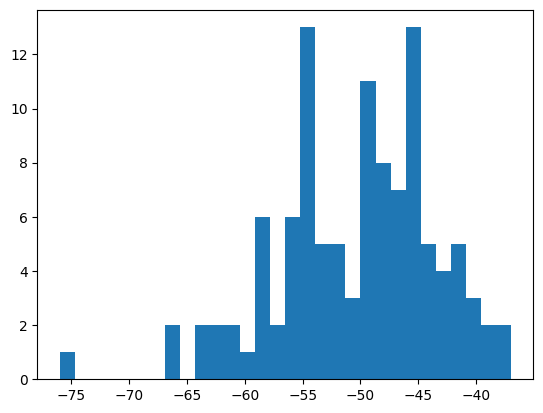

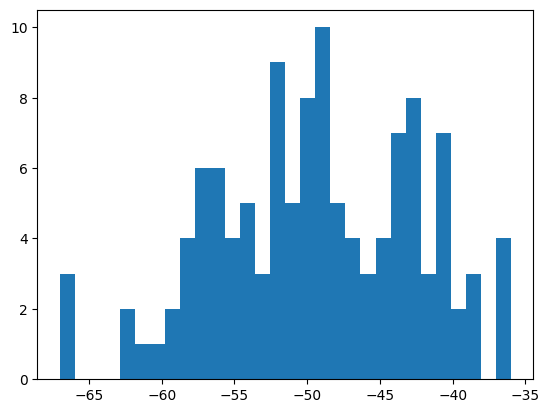

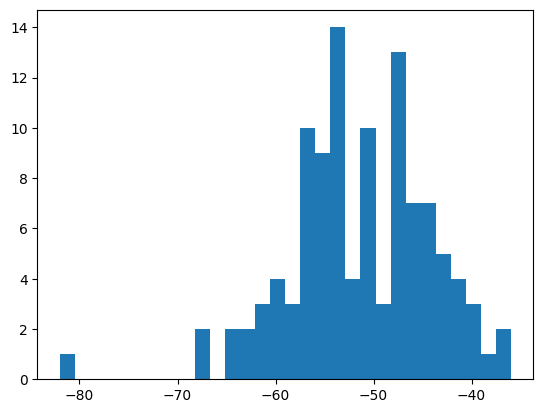

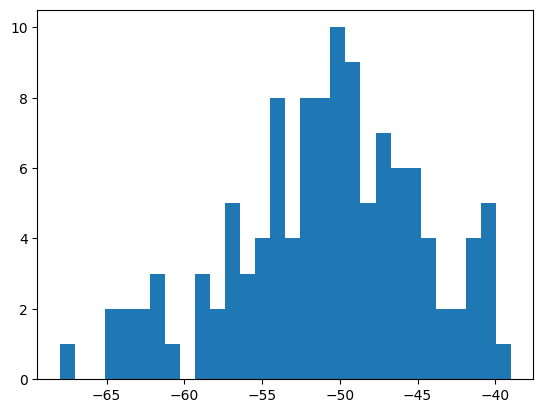

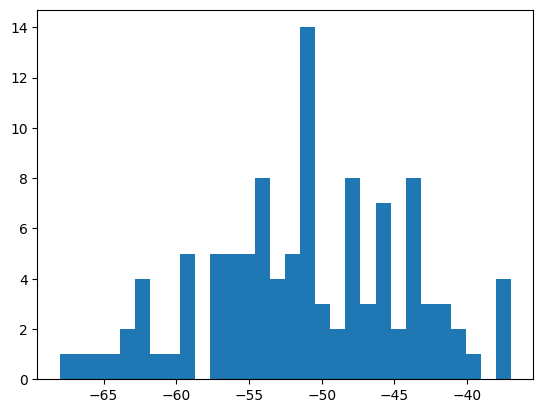

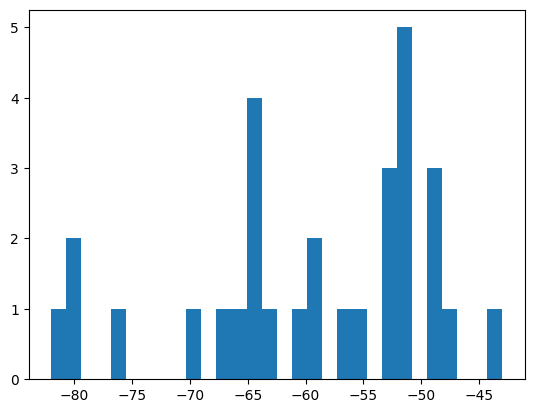

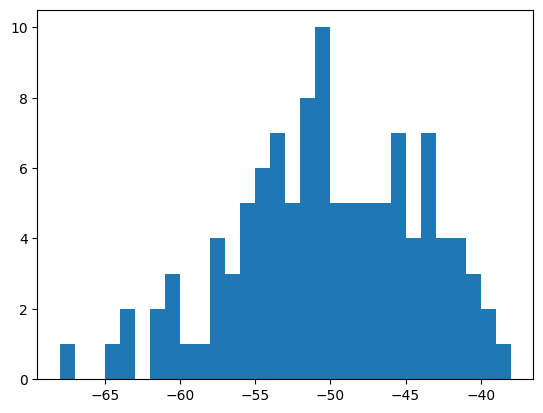

In [7]:
for vals in data:
    plt.figure()
    plt.hist(vals, bins=30)
    plt.show()

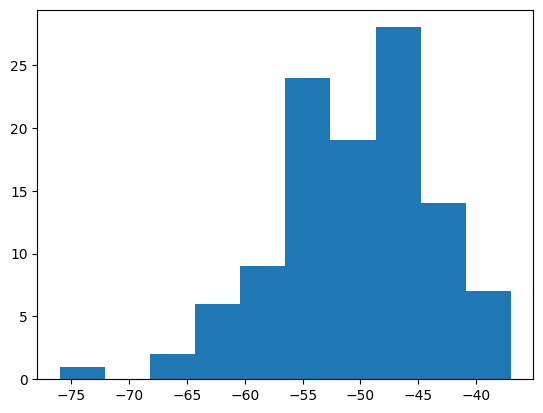

In [5]:
plt.hist(data[0])
plt.show()
